In [118]:
infile = open('tab_galaxies.dat', 'r')
import numpy as np
import matplotlib.pyplot as plt
data = []
for line in infile:
    # Typical line: variable = value 
    data1 = {}
    dhi, lgmhi, d, pa, ba, mb, d25  = line.split(' ')
    dhi = dhi.strip()
    try:
      data1['dhi'] = float(dhi)
    except ValueError as err:
      data1['dhi'] = None
    d = d.strip()
    try:
      data1['d'] = float(d)
    except ValueError as err:
      data1['d'] = None
    lgmhi = lgmhi.strip()
    try:
      data1['lgmhi'] = float(lgmhi)
    except ValueError as err:
      data1['lgmhi'] = None
    pa = pa.strip()
    try:
      data1['pa'] = float(pa)
    except ValueError as err:
      data1['pa'] = None
    ba = ba.strip()
    try:
      data1['ba'] = float(ba)
    except ValueError as err:
      data1['ba'] = None
    mb = mb.strip()
    try:
      data1['mb'] = float(mb)
    except ValueError as err:
      data1['mb'] = None
    d25 = d25.strip()
    try:
      data1['d25'] = float(d25)
    except ValueError as err:
        data1['d25'] = None
    try:
      data1['lgdhi'] = np.log10(float(dhi))
    except ValueError as err:
      data1['lgdhi'] = None
    try:
      data1['lgd25'] = np.log10(float(d25))
    except ValueError as err:
        data1['lgd25'] = None
    data.append(data1)
infile.close()
data.pop(0)

{'dhi': None,
 'd': None,
 'lgmhi': None,
 'pa': None,
 'ba': None,
 'mb': None,
 'd25': None,
 'lgdhi': None,
 'lgd25': None}

0.5058389321226975 -3.290948627094152


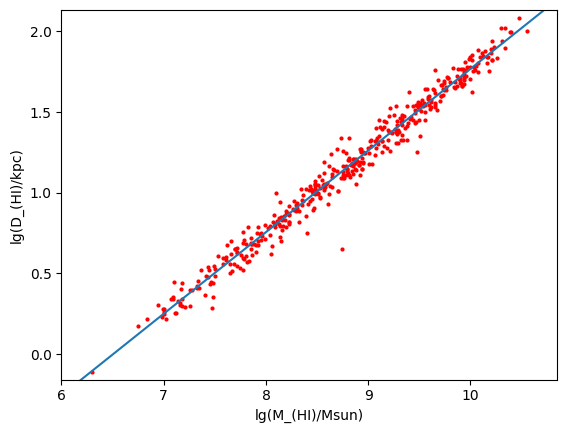

In [109]:
ys = []
xs = []
for d1 in data:
    ys.append(d1['lgdhi'])
    xs.append(d1['lgmhi'])
A, B = np.polyfit(xs, ys, 1)
print(A, B)
plt.plot(xs, ys, 'ro', markersize=2)
x = np.linspace(-100.,100.)
plt.plot(x, A*x+B )
plt.xlim(left = min(xs) - 0.3, right = max(xs) + 0.3)
plt.ylim(bottom = min(ys) - 0.05, top = max(ys) + 0.05)
plt.xlabel('lg(M_(HI)/Msun)')
plt.ylabel('lg(D_(HI)/kpc)')
plt.savefig('lgmhi_lgdhi.png')
plt.show()

-4.888277077563157 -12.702255862063483


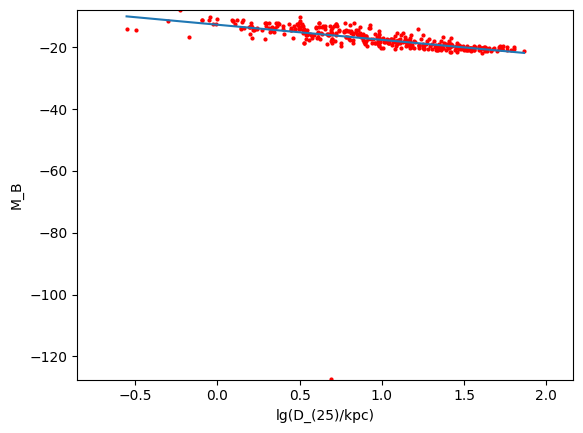

In [111]:
ys = []
xs = []
for d1 in data:
    if d1['mb'] == None or d1['lgd25'] == None:
        continue
    ys.append(d1['mb'])
    xs.append(d1['lgd25'])
A, B = np.polyfit(xs, ys, 1)
print(A, B)
plt.plot(xs, ys, 'ro', markersize=2)
x = np.linspace(min(xs),max(xs))
plt.plot(x, A*x+B )
plt.xlim(left = min(xs) - 0.3, right = max(xs) + 0.3)
plt.ylim(bottom = min(ys) - 0.05, top = max(ys) + 0.05)
plt.xlabel('lg(D_(25)/kpc)')
plt.ylabel('M_B')
plt.show()
# У нас вылазит выброс, попробуем отфильтровать в следующей части блокнота

catch
catch
catch
-5.211283983176877 -12.106638343837107


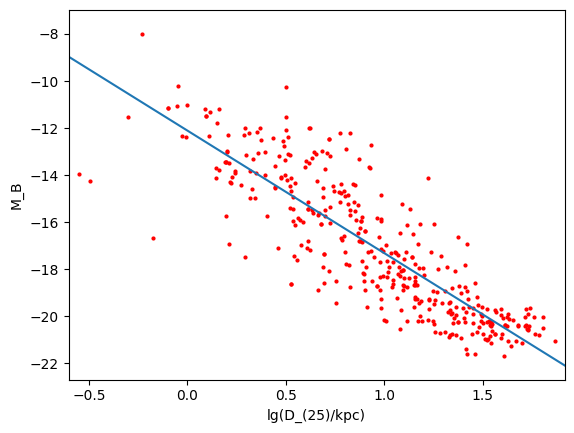

In [115]:
ys = []
xs = []
for d1 in data:
    try:
        if d1['mb'] < -100:
            d1['mb'] = None
            d1['lgd25'] = None
            print('catch')
    except TypeError:
        pass
    if d1['mb'] == None or d1['lgd25'] == None:
        continue
    ys.append(d1['mb'])
    xs.append(d1['lgd25'])
A, B = np.polyfit(xs, ys, 1)
print(A, B)
plt.plot(xs, ys, 'ro', markersize=2)
x = np.linspace(-100,100)
plt.plot(x, A*x+B )
plt.xlim(left = min(xs) - 0.05, right = max(xs) + 0.05)
plt.ylim(bottom = min(ys) - 1, top = max(ys) + 1)
plt.xlabel('lg(D_(25)/kpc)')
plt.ylabel('M_B')
plt.savefig('mb_lgd25.png')
plt.show()

catch
catch
catch
catch
-5.211283983176877 -12.106638343837107


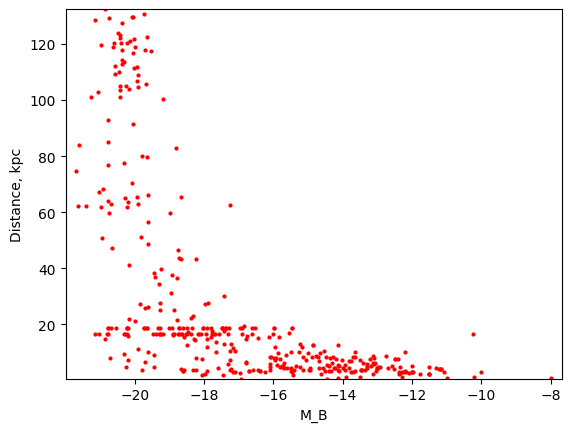

In [117]:
ys = []
xs = []
# Сразу имплементируем фильтрацию ошибок
for d1 in data:
    try:
        if d1['mb'] < -100:
            d1['mb'] = None
            d1['d'] = None
            print('catch')
    except TypeError:
        pass
    try:
        if d1['d'] > 160:
            d1['d'] = None
            d1['mb'] = None
            print('catch')
    except TypeError:
        pass
    if d1['d'] == None or d1['mb'] == None:
        continue
    ys.append(d1['d'])
    xs.append(d1['mb'])
#A, B = np.polyfit(xs, ys, -1)
print(A, B)
plt.plot(xs, ys, 'ro', markersize=2)
#x = np.linspace(min(xs),max(xs))
#plt.plot(x, A*x+B )
plt.xlim(left = min(xs) - 0.3, right = max(xs) + 0.3)
plt.ylim(bottom = min(ys) - 0.05, top = max(ys) + 0.05)
plt.xlabel('M_B')
plt.ylabel('Distance, kpc')
plt.savefig('d_mb.png')
plt.show()
#Кажется, никакой четкой корреляции нет, хотя можно было бы придумать что-нибудь с гиперболой